## Crop Prediction Model

In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import json
import requests
import joblib
from io import StringIO

In [3]:
crop_df = pd.read_csv('../data/-harvard.csv')
print(crop_df.columns)
crop_df

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana


In [4]:
# model inputs: Nitrogen Levels, Phosphorus Levels, Potassium Levels, Average Temperature, Average Humidity, Total Rainfall
X = crop_df[['N', 'P', 'K', 'temperature', 'humidity', 'rainfall', 'label']]
y = X.pop('label')
print(y.unique())
X

['rice' 'maize' 'Soyabeans' 'beans' 'peas' 'groundnuts' 'cowpeas' 'banana'
 'mango' 'grapes' 'watermelon' 'apple' 'orange' 'cotton' 'coffee']


,N,P,K,temperature,humidity,rainfall
0,90,42,43,20.879744,82.002744,202.935536
1,85,58,41,21.770462,80.319644,226.655537
2,60,55,44,23.004459,82.320763,263.964248
3,74,35,40,26.491096,80.158363,242.864034
4,78,42,42,20.130175,81.604873,262.717340
...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,116.161684
1693,114,94,53,26.335449,76.853201,118.685826
1694,110,78,50,25.937302,78.898644,98.217475
1695,94,70,48,25.136865,84.883944,91.464425


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Instantiate KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
# Make predictions on the test set
pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the KNN classifier
accuracy = metrics.accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
# Calculate macro-averaged precision
macro_precision = metrics.precision_score(y_test, pred, average='macro')

# Calculate macro-averaged recall
macro_recall = metrics.recall_score(y_test, pred, average='macro')

print("Macro-averaged Precision:", macro_precision)
print("Macro-averaged Recall:", macro_recall)
pred[:5]

Accuracy: 0.9917550058892816
Macro-averaged Precision: 0.9931664862914863
Macro-averaged Recall: 0.9914585483316133


array(['cowpeas', 'maize', 'maize', 'beans', 'cotton'], dtype=object)

In [19]:
# Get the unique class labels
class_labels = sorted(y.unique())
class_labels

['Soyabeans',
 'apple',
 'banana',
 'beans',
 'coffee',
 'cotton',
 'cowpeas',
 'grapes',
 'groundnuts',
 'maize',
 'mango',
 'orange',
 'peas',
 'rice',
 'watermelon']

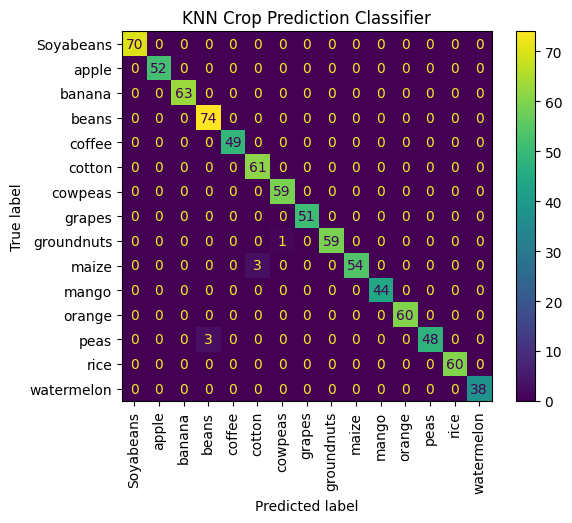

In [18]:
confusion_matrix2 = metrics.confusion_matrix(y_test, pred)

cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels=class_labels)

cm_display2.plot()
plt.title('KNN Crop Prediction Classifier')
plt.xticks(rotation=90)
plt.show()

In [10]:
print(y_test[:10])
print(pred[:10])


618     cowpeas
115       maize
135       maize
350       beans
1395     cotton
1447     coffee
669     cowpeas
1685     banana
1448     coffee
772      banana
Name: label, dtype: object
['cowpeas' 'maize' 'maize' 'beans' 'cotton' 'coffee' 'cowpeas' 'banana'
 'coffee' 'banana']


In [65]:
# save the model
joblib.dump(knn_classifier, './crop_prediction_model.pkl')

['./crop_prediction_model.pkl']

0.9917550058892816


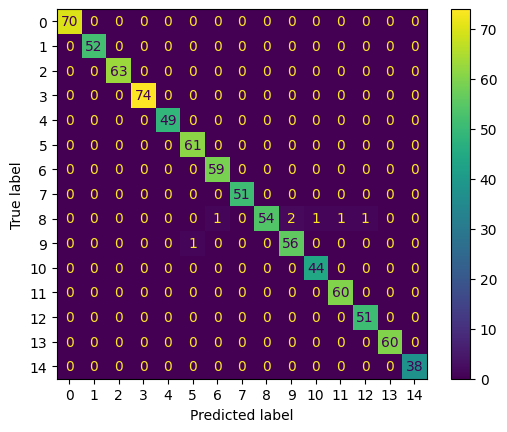

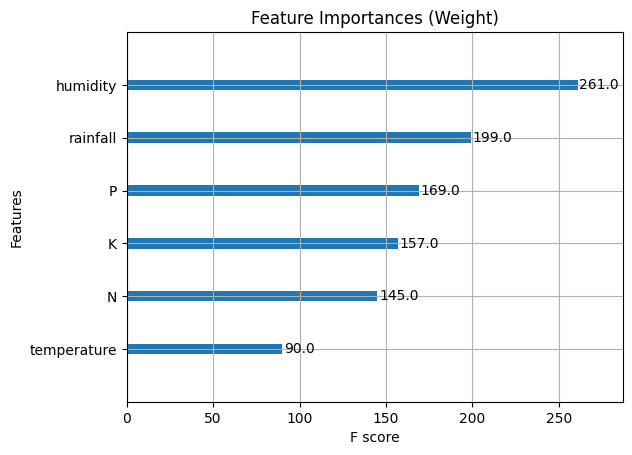

In [67]:
encoder = LabelEncoder()
en_y_train = encoder.fit_transform(y_train)
en_y_test = encoder.fit_transform(y_test)
xgb_classifier3 = XGBClassifier(objective='multi:softmax')

xgb_classifier3.fit(X_train, en_y_train)
pred2 = xgb_classifier3.predict(X_test)
print(metrics.accuracy_score(en_y_test, pred2))
confusion_matrix2 = metrics.confusion_matrix(en_y_test, pred2)

cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2)

cm_display2.plot()
plt.show()
xgb.plot_importance(xgb_classifier3, importance_type='weight', max_num_features=10)
plt.title('Feature Importances (Weight)')
plt.show()

In [188]:
'''
# Load the trained model from the file
crop_pred_model = joblib.load('./crop_prediction_model.pkl')

# Use the loaded model to make predictions on new data
new_data_predictions = crop_pred_model.predict(X_test)
# Evaluate the accuracy of the KNN classifier
accuracy = metrics.accuracy_score(y_test, new_data_predictions)
print("Accuracy:", accuracy)
'''

Accuracy: 0.9917550058892816


### KNN classifier performed the best so it will be used for predicting which crop to cultivate